In [199]:
import numpy as np
import pandas as pd
import pickle
import joblib

In [2]:
train_data = pd.read_csv('train-data.csv') 
test_data = pd.read_csv('test-data.csv') 


In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_data.shape

(6019, 14)

In [5]:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
# remove unnamed column

train_data = train_data.drop(['Unnamed: 0'], axis = 1)

In [7]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
train_data['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [10]:
# print unique location

train_data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
# fuel type

train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [12]:
# transmission

train_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
# owner type

train_data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [14]:
#no. of seats 

train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [15]:
# checking null

train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [16]:
# drop null storing rows

train_data = train_data.dropna()

In [17]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55


In [18]:
# check null values

train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [19]:
train_data.shape  # after dropping null rows

(823, 13)

In [20]:
# after dropping null rows index are unstructured
# reset index

train_data = train_data.reset_index(drop = True)

In [21]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55


In [22]:
train_data.shape[0]

823

In [23]:
train_data = train_data.drop(['Company'], axis = 1)

KeyError: "['Company'] not found in axis"

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               823 non-null    object 
 1   Location           823 non-null    object 
 2   Year               823 non-null    int64  
 3   Kilometers_Driven  823 non-null    int64  
 4   Fuel_Type          823 non-null    object 
 5   Transmission       823 non-null    object 
 6   Owner_Type         823 non-null    int64  
 7   Seats              823 non-null    float64
 8   Price              823 non-null    float64
 9   Mileage(km/kg)     823 non-null    object 
 10  Engine(CC)         823 non-null    object 
 11  Power(bhp)         823 non-null    object 
 12  New_Price(Lac)     823 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 83.7+ KB


In [24]:
# train_data['Mileage']
train_data['Price']

0       4.50
1      17.50
2       9.95
3      15.00
4      18.55
       ...  
818     4.00
819     3.25
820     7.43
821     3.20
822     4.75
Name: Price, Length: 823, dtype: float64

In [25]:
train_data['Engine']

0      1199 CC
1      2755 CC
2      1462 CC
3      2477 CC
4      1995 CC
        ...   
818    1193 CC
819    1598 CC
820    1248 CC
821    1198 CC
822    1248 CC
Name: Engine, Length: 823, dtype: object

In [26]:
train_data['Power']

0        88.7 bhp
1       171.5 bhp
2      103.25 bhp
3      175.56 bhp
4         190 bhp
          ...    
818      88.7 bhp
819     103.5 bhp
820      88.5 bhp
821      86.8 bhp
822        74 bhp
Name: Power, Length: 823, dtype: object

In [27]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]
    
        

In [28]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'New_Price(Lac)'] = train_data['New_Price'][i].split()[0]

In [29]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_Price(Lac)
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.2,1199,88.7,8.61
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,Toyota,11.36,2755,171.5,21
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,Maruti,21.56,1462,103.25,10.65
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00,Mitsubishi,13.5,2477,175.56,32.01
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55,BMW,22.69,1995,190,47.87


In [30]:
# drop useless columns

train_data.drop(['Mileage'], axis = 1, inplace = True)
train_data.drop(['Engine'], axis = 1, inplace = True)
train_data.drop(['Power'], axis = 1, inplace = True)


In [31]:
train_data.drop(['New_Price'],axis = 1, inplace = True)

In [32]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_Price(Lac)
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.2,1199,88.7,8.61
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,8.0,17.50,Toyota,11.36,2755,171.5,21
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,5.0,9.95,Maruti,21.56,1462,103.25,10.65
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,7.0,15.00,Mitsubishi,13.5,2477,175.56,32.01
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,5.0,18.55,BMW,22.69,1995,190,47.87


In [33]:
# Goal columns

train_data['Price'].describe()

count    823.000000
mean      13.647606
std       14.860539
min        0.700000
25%        5.000000
50%        8.200000
75%       17.500000
max      160.000000
Name: Price, dtype: float64

In [214]:
train_data['Mileage(km/kg)'].max()

'33.54'

In [34]:
# fuel type

train_data['Fuel_Type'].describe()

count        823
unique         3
top       Diesel
freq         443
Name: Fuel_Type, dtype: object

In [35]:
import seaborn as sns

import matplotlib.pyplot as plt

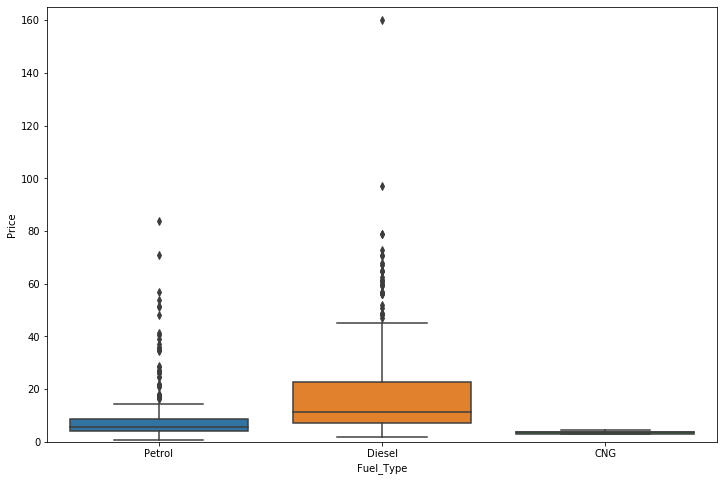

In [36]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data = data)
fig.axis(ymin=0, ymax=165);

# price of diesel vehicle is more

In [37]:
train_data['Year'].describe()

count     823.000000
mean     2015.869988
std         2.378709
min      2001.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2019.000000
Name: Year, dtype: float64

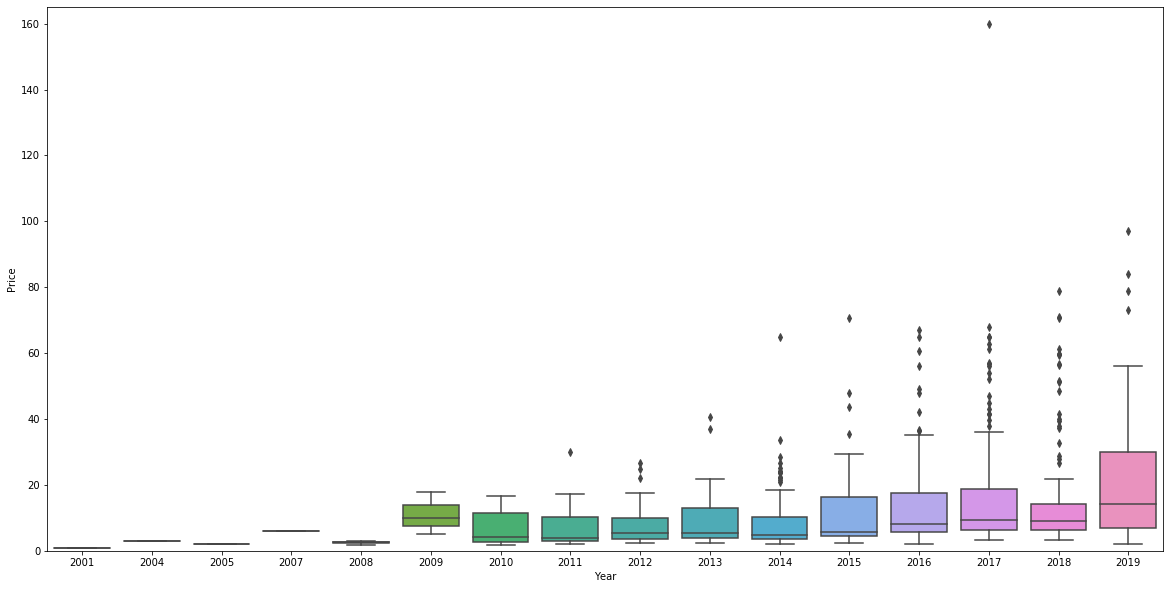

In [38]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
# plt.xticks(rotation=90);

# new model  price of vehicle is more than compare to old model

In [39]:
train_data['Owner_Type'].describe()

count       823
unique        3
top       First
freq        765
Name: Owner_Type, dtype: object

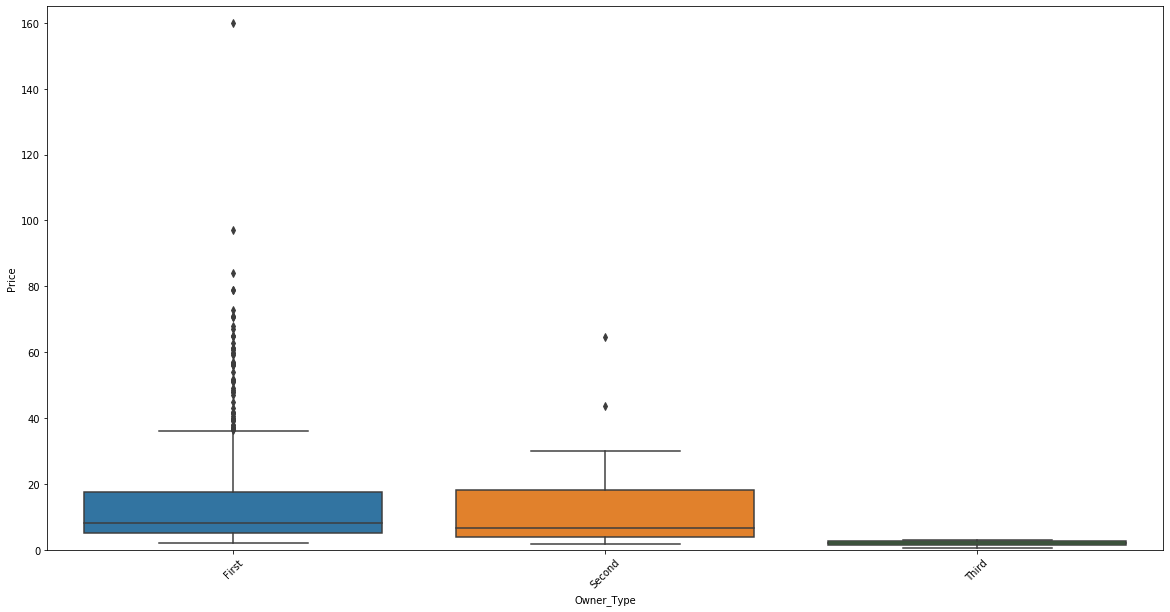

In [40]:
var = 'Owner_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=45);

# Price of single owner car is more than second and third

In [41]:
train_data['Company'].describe()

count        823
unique        24
top       Maruti
freq         194
Name: Company, dtype: object

In [42]:
train_data['Company'].value_counts()

Maruti           194
Hyundai           96
Toyota            82
Honda             68
BMW               57
Tata              43
Volkswagen        42
Mercedes-Benz     42
Renault           27
Ford              25
Mahindra          25
Audi              24
Skoda             19
Mini              16
Jeep              15
Nissan            15
Land              10
Datsun             7
Mitsubishi         6
Jaguar             4
Volvo              3
Porsche            1
Fiat               1
Isuzu              1
Name: Company, dtype: int64

In [43]:
train_data['Company'].min()

'Audi'

In [44]:
x = train_data['Company']
y = train_data['Price']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

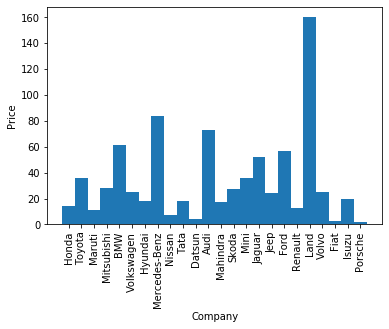

In [45]:
plt.bar(x,y, width = 1)
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation = 90)


<Figure size 1440x720 with 0 Axes>

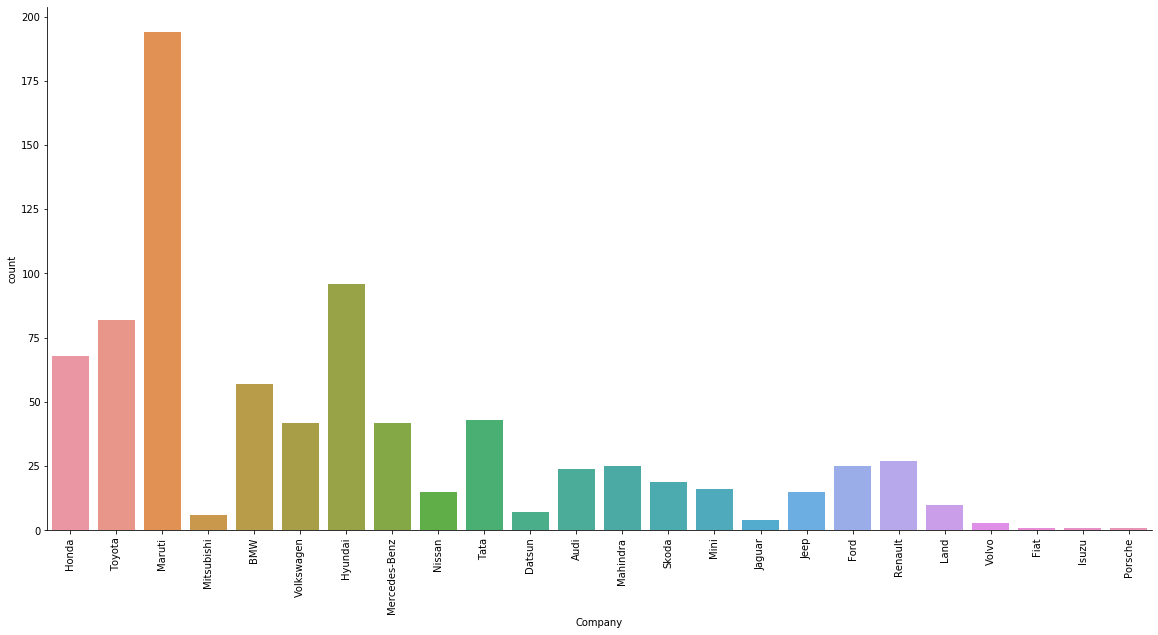

In [46]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

In [47]:
train_data['Location'].value_counts()

Kochi         142
Mumbai        138
Coimbatore    135
Hyderabad      80
Pune           62
Kolkata        55
Delhi          54
Chennai        48
Jaipur         41
Ahmedabad      36
Bangalore      32
Name: Location, dtype: int64

# Kochi has highest people who has car

<function matplotlib.pyplot.show(*args, **kw)>

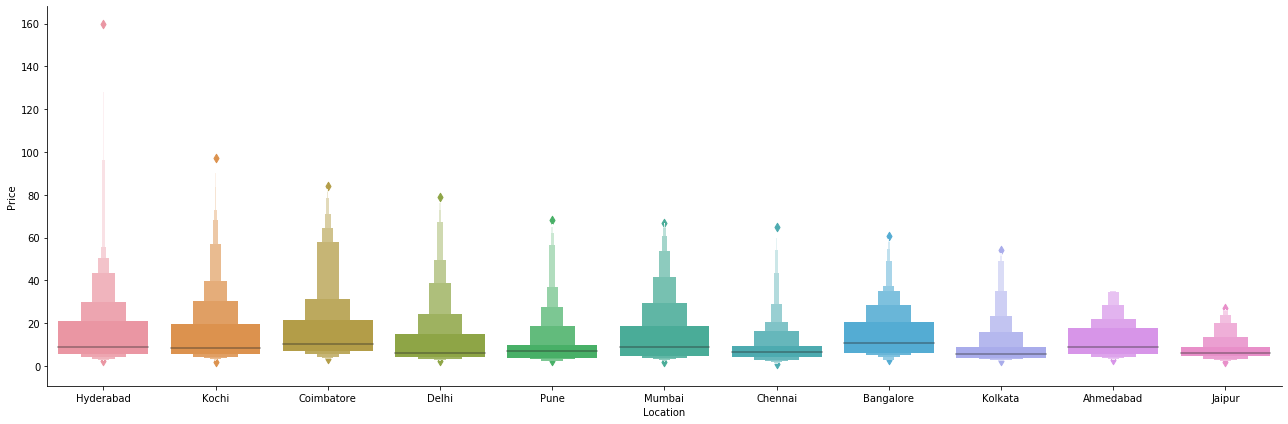

In [48]:
# Plot Location vs Price

var = 'Location'
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [49]:
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [52]:
# fuel type

var = 'Fuel_Type'

train_data[var].value_counts()



Diesel    443
Petrol    371
CNG         9
Name: Fuel_Type, dtype: int64

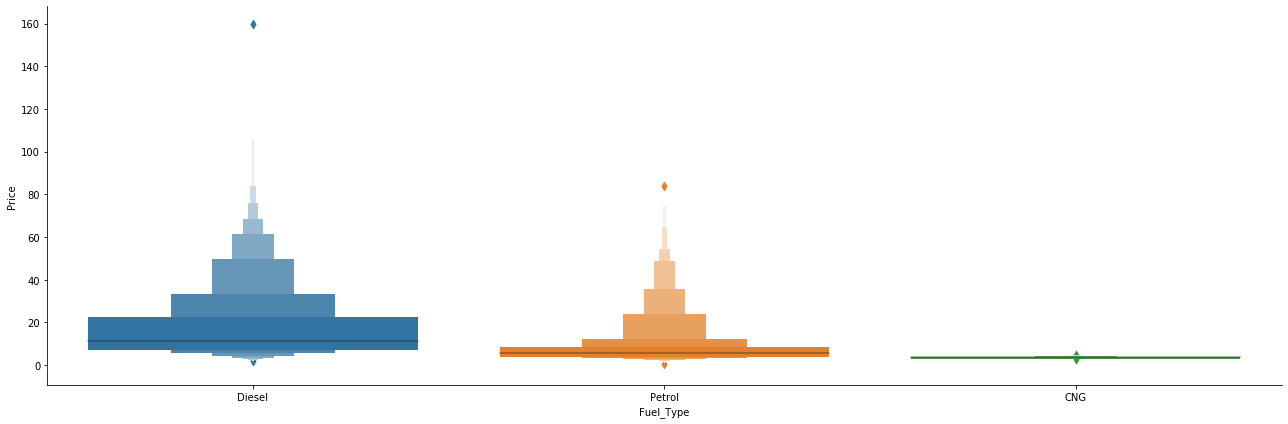

In [53]:
# Plot Fuel_Type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [54]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [55]:
# transmission

var = 'Transmission'

train_data['Transmission'].value_counts()

Manual       512
Automatic    311
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

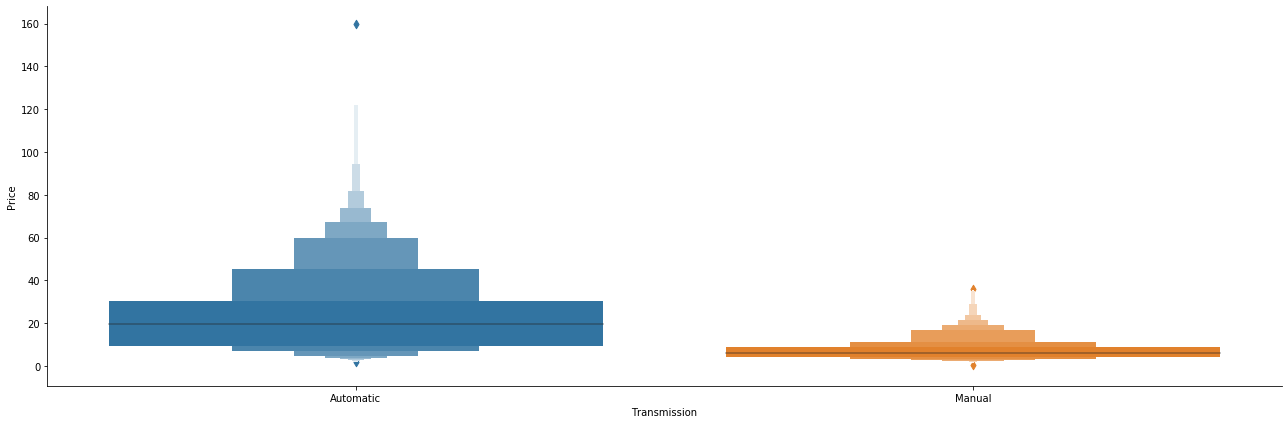

In [56]:
# Plot Transmission vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [57]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,0
2,1
3,1
4,0


In [58]:
var = 'Owner_Type'

train_data[var].value_counts()

First     765
Second     55
Third       3
Name: Owner_Type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

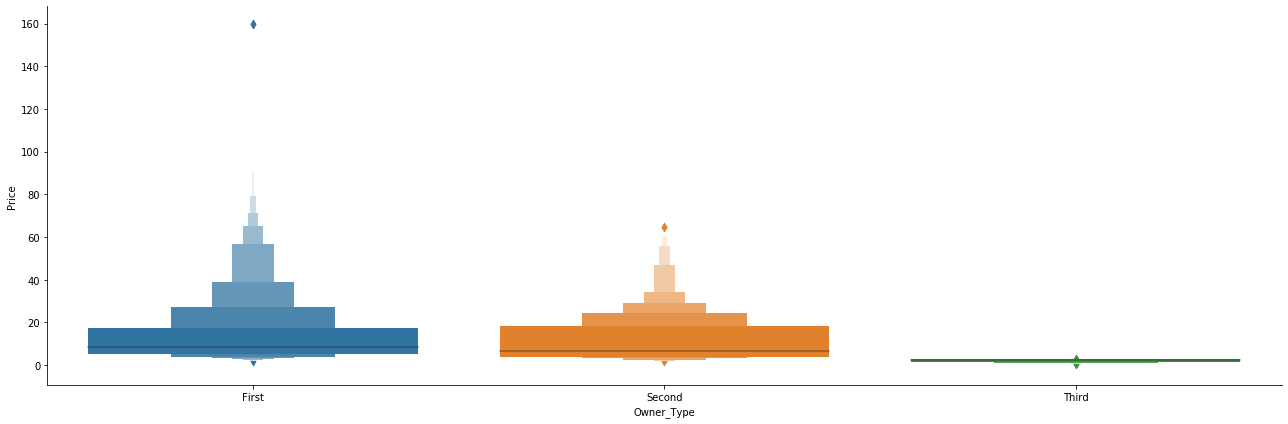

In [59]:
# Plot owner_type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [60]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_Price(Lac)
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.2,1199,88.7,8.61
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,1,8.0,17.50,Toyota,11.36,2755,171.5,21
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,1,5.0,9.95,Maruti,21.56,1462,103.25,10.65
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,1,7.0,15.00,Mitsubishi,13.5,2477,175.56,32.01
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,1,5.0,18.55,BMW,22.69,1995,190,47.87


In [208]:
train_data['Kilometers_Driven'].describe()

count       823.000000
mean      40498.402187
std       28791.171759
min         600.000000
25%       20487.500000
50%       34895.000000
75%       53829.000000
max      215000.000000
Name: Kilometers_Driven, dtype: float64

In [209]:
train_data['Seats'].describe()

count    823.000000
mean       5.304982
std        0.795707
min        2.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        8.000000
Name: Seats, dtype: float64

In [210]:
train_data['Owner_Type'].describe()

count    823.000000
mean       1.074119
std        0.275696
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Owner_Type, dtype: float64

In [61]:
var = 'Company'

train_data[var].value_counts()

Maruti           194
Hyundai           96
Toyota            82
Honda             68
BMW               57
Tata              43
Volkswagen        42
Mercedes-Benz     42
Renault           27
Ford              25
Mahindra          25
Audi              24
Skoda             19
Mini              16
Jeep              15
Nissan            15
Land              10
Datsun             7
Mitsubishi         6
Jaguar             4
Volvo              3
Porsche            1
Fiat               1
Isuzu              1
Name: Company, dtype: int64

In [222]:
train_data['Engine(CC)'].value_counts()

1248    92
1197    81
998     64
1498    55
1995    53
2755    37
1497    35
1199    33
1198    21
2393    20
1798    20
1591    20
1968    19
1582    17
1461    17
799     16
2143    15
1956    14
1193    14
1999    13
1196    12
999     11
2987    11
1186    10
2993    10
1598    10
2179    10
1364     9
1998     8
1950     8
1496     8
2523     7
2477     6
1462     6
2967     4
2996     4
1969     3
1493     3
1194     3
1991     2
2489     2
2894     2
2498     2
1396     2
1595     1
1368     1
1984     1
2999     1
1395     1
2995     1
2694     1
2487     1
2198     1
1086     1
2925     1
4951     1
1047     1
1997     1
Name: Engine(CC), dtype: int64

In [226]:
train_data['Power(bhp)'].value_counts()

190      55
81.86    41
88.5     39
67.04    38
88.7     32
         ..
143       1
83.8      1
69        1
99.6      1
97.6      1
Name: Power(bhp), Length: 115, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

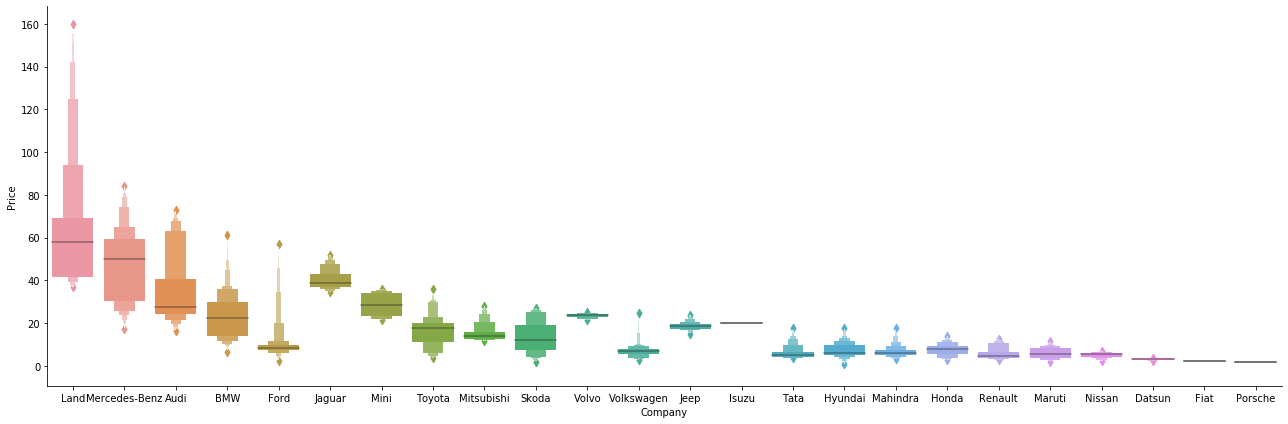

In [62]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [63]:
train_data.drop(['Company'], axis = 1, inplace = True)

In [64]:
final_train_data = pd.concat([train_data, Location, Fuel_t, Transmission], axis = 1)

In [65]:
final_train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),...,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.2,...,0,0,0,0,0,0,0,0,1,1
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,1,8.0,17.50,11.36,...,0,0,0,0,0,1,0,1,0,0
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,1,5.0,9.95,21.56,...,0,0,0,1,0,0,0,0,1,1
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,1,7.0,15.00,13.5,...,1,0,0,0,0,0,0,1,0,1
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,1,5.0,18.55,22.69,...,0,0,0,1,0,0,0,1,0,0


In [67]:
final_train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'New_Price(Lac)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [68]:
final_train_data.drop(['Location', 'Fuel_Type', 'Transmission'], axis = 1, inplace = True)


In [69]:
final_train_data.head()

,Name,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),New_Price(Lac),...,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,Honda Jazz V,2011,46000,1,5.0,4.50,18.2,1199,88.7,8.61,...,0,0,0,0,0,0,0,0,1,1
1,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,1,8.0,17.50,11.36,2755,171.5,21,...,0,0,0,0,0,1,0,1,0,0
2,Maruti Ciaz Zeta,2018,25692,1,5.0,9.95,21.56,1462,103.25,10.65,...,0,0,0,1,0,0,0,0,1,1
3,Mitsubishi Pajero Sport 4X4,2014,110000,1,7.0,15.00,13.5,2477,175.56,32.01,...,1,0,0,0,0,0,0,1,0,1
4,BMW 3 Series 320d,2014,32982,1,5.0,18.55,22.69,1995,190,47.87,...,0,0,0,1,0,0,0,1,0,0


In [70]:
final_train_data.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'New_Price(Lac)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [71]:
final_train_data.drop(['New_Price(Lac)'], axis = 1, inplace = True)

In [72]:
final_train_data.head()

,Name,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,...,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,Honda Jazz V,2011,46000,1,5.0,4.50,18.2,1199,88.7,0,...,0,0,0,0,0,0,0,0,1,1
1,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,1,8.0,17.50,11.36,2755,171.5,0,...,0,0,0,0,0,1,0,1,0,0
2,Maruti Ciaz Zeta,2018,25692,1,5.0,9.95,21.56,1462,103.25,0,...,0,0,0,1,0,0,0,0,1,1
3,Mitsubishi Pajero Sport 4X4,2014,110000,1,7.0,15.00,13.5,2477,175.56,0,...,1,0,0,0,0,0,0,1,0,1
4,BMW 3 Series 320d,2014,32982,1,5.0,18.55,22.69,1995,190,0,...,0,0,0,1,0,0,0,1,0,0


In [73]:
final_train_data.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [74]:
final_train_data.shape

(823, 22)

In [76]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [77]:
test_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [79]:
test_data.shape

(1234, 13)

In [81]:
test_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [82]:
test_data.shape

(1234, 12)

In [83]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [85]:
test_data['Engine'].isnull().sum()

10

In [86]:
test_data = test_data[test_data['Engine'].notna()]

In [88]:
test_data['Engine'].isnull().sum()

0

In [93]:
test_data = test_data[test_data['Power'].notna()]

In [96]:
test_data['Seats'].isnull().sum()

1

In [97]:
test_data = test_data[test_data['Seats'].notna()]

In [98]:
test_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1041
dtype: int64

In [99]:
test_data.shape

(1223, 12)

In [110]:
test_data = test_data.reset_index(drop=True)
print('Index reset done')

Index reset done


In [111]:
for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
    

In [113]:
test_data.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,32.26,998,58.2
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,24.7,796,47.3
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,13.68,2393,147.8
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,23.59,1364,null


In [114]:
test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

casting 1 Done


In [115]:
position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)

In [118]:
print(position)

[3, 73, 121, 142, 190, 196, 258, 366, 408, 419, 425, 434, 554, 569, 603, 670, 696, 863, 868, 918, 1062, 1115]


In [120]:
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 


In [121]:
test_data.shape

(1201, 15)

In [122]:
test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done')

casting 2 Done


In [123]:
for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

In [124]:
test_data['New_car_Price']

0         NaN
1         NaN
2       25.27
3         NaN
4         NaN
        ...  
1196      NaN
1197      NaN
1198      NaN
1199      NaN
1200      NaN
Name: New_car_Price, Length: 1201, dtype: object

In [125]:
test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

In [126]:
test_data['New_car_Price']

0         NaN
1         NaN
2       25.27
3         NaN
4         NaN
        ...  
1196      NaN
1197      NaN
1198      NaN
1199      NaN
1200      NaN
Name: New_car_Price, Length: 1201, dtype: float64

In [127]:
test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

In [128]:
test_data.head(4)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Delhi,2014,40929,CNG,Manual,First,4.0,32.26,998.0,58.20,NaN
1,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,24.70,796.0,47.30,NaN
2,Mumbai,2017,34000,Diesel,Manual,First,7.0,13.68,2393.0,147.80,25.27
3,Mumbai,2014,29000,Petrol,Manual,First,5.0,18.50,1197.0,82.85,NaN


In [129]:
test_data.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Mileage(km/kg)          0
Engine(CC)              0
Power(bhp)              0
New_car_Price        1019
dtype: int64

In [130]:
var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0


In [131]:
var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [134]:
var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head(10)

,Transmission_Manual
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,0


In [135]:
test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Delhi,2014,40929,CNG,Manual,1,4.0,32.26,998.0,58.20,NaN
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,24.70,796.0,47.30,NaN
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,13.68,2393.0,147.80,25.27
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,18.50,1197.0,82.85,NaN
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,16.00,2179.0,140.00,NaN


In [136]:
final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Delhi,2014,40929,CNG,Manual,1,4.0,32.26,998.0,58.20,...,0,0,0,0,0,0,0,0,0,1
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,24.70,796.0,47.30,...,0,0,0,0,0,0,0,0,1,1
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,13.68,2393.0,147.80,...,0,0,0,0,1,0,1,0,0,1
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,18.50,1197.0,82.85,...,0,0,0,0,1,0,0,0,1,1
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,16.00,2179.0,140.00,...,0,0,0,0,0,0,1,0,0,1


In [137]:

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Final Test Size:  (1201, 21)


# Final train_data

In [139]:
final_train_data.head(4)

,Name,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,...,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,Honda Jazz V,2011,46000,1,5.0,4.50,18.2,1199,88.7,0,...,0,0,0,0,0,0,0,0,1,1
1,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,1,8.0,17.50,11.36,2755,171.5,0,...,0,0,0,0,0,1,0,1,0,0
2,Maruti Ciaz Zeta,2018,25692,1,5.0,9.95,21.56,1462,103.25,0,...,0,0,0,1,0,0,0,0,1,1
3,Mitsubishi Pajero Sport 4X4,2014,110000,1,7.0,15.00,13.5,2477,175.56,0,...,1,0,0,0,0,0,0,1,0,1


Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [143]:
final_train_data.drop(['Name'], axis = 1, inplace = True)

In [144]:
train_data = train_data.reset_index(drop=True)

In [145]:
final_train_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [142]:
final_test.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

# Split into X and y

In [152]:
z = final_train_data.iloc[:,0:-1]

In [153]:
z.drop(['Price'], axis= 1, inplace = True)

In [154]:
z = z.reset_index(drop=True)

In [155]:
z.head(4)

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2011,46000,1,5.0,18.2,1199,88.7,0,1,0,0,0,0,0,0,0,0,0,1
1,2016,36000,1,8.0,11.36,2755,171.5,0,0,0,0,0,0,0,0,1,0,1,0
2,2018,25692,1,5.0,21.56,1462,103.25,0,0,0,0,0,0,1,0,0,0,0,1
3,2014,110000,1,7.0,13.5,2477,175.56,0,0,0,1,0,0,0,0,0,0,1,0


In [156]:
z.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [157]:
z.shape

(823, 19)

In [158]:
y = final_train_data.loc[:,['Price']]
y.shape

(823, 1)

In [159]:
y.head()

,Price
0,4.50
1,17.50
2,9.95
3,15.00
4,18.55


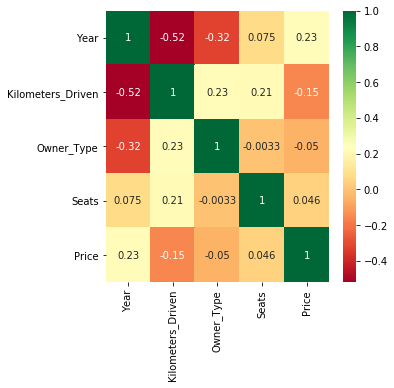

In [165]:
plt.figure(figsize = (5,5))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

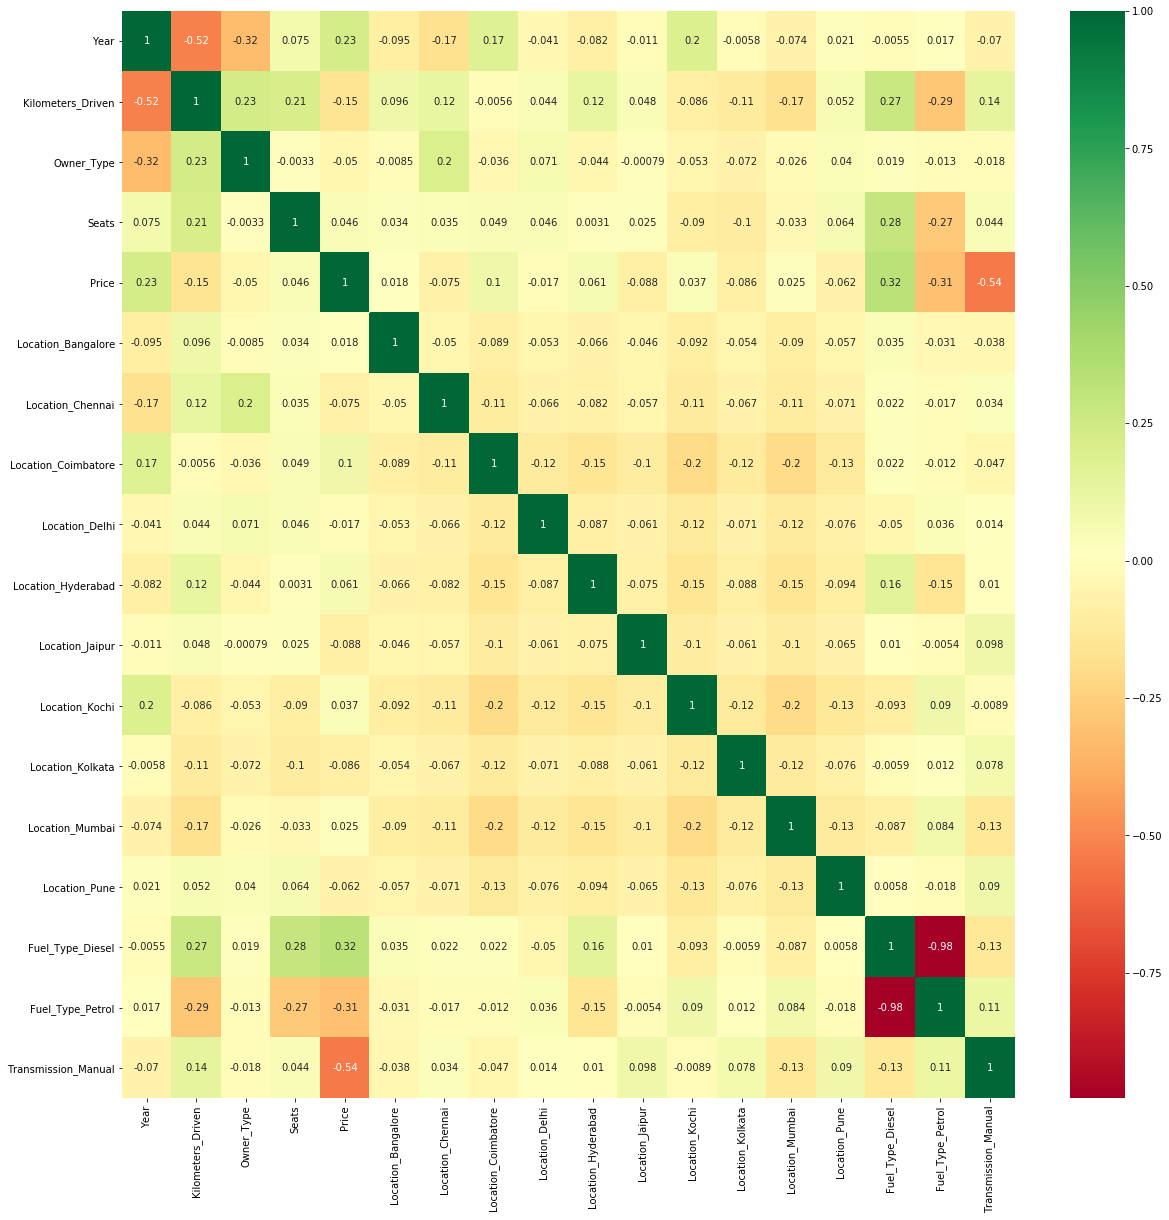

In [162]:
plt.figure(figsize = (20,20))
sns.heatmap(final_train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [190]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()


In [189]:
selection.fit(Z_train,y_train)

C:\Users\bitto\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [191]:
y_pred =selection.predict(Z_test)

NotFittedError: This ExtraTreesRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [193]:
er = ExtraTreesRegressor(  
             n_estimators=120,
             
             max_features= None, 
             max_depth = 14 )

er.fit(Z_train, y_train)

C:\Users\bitto\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=14, max_features=None, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=120, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [195]:
y_pred = er.predict(Z_test)

In [197]:
er.score(Z_train, y_train)

0.9996279793988777

In [198]:
er.score(Z_test, y_test)

0.6930211396398034

In [188]:
selection.score(z,y)

0.9999999583056771

In [169]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(z, y, test_size = 0.2, random_state = 25)

In [170]:
Z_train.shape

(658, 19)

In [171]:
Z_test.shape

(165, 19)

# Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [173]:
linear_reg.fit(Z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
y_pred= linear_reg.predict(Z_test)

In [176]:
y_pred == y_test

,Price
190,False
720,False
691,False
187,False
152,False
...,...
700,False
144,False
279,False
601,False


# Accuracy on training dataset

In [177]:
linear_reg.score(Z_train, y_train)

0.7084550206744843

In [178]:
linear_reg.score(Z_test, y_test)

0.5861546681815348

## Not a good accuracy

# Use random forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [180]:
rf_reg.fit(Z_train, y_train)

C:\Users\bitto\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [183]:
y_pred = rf_reg.predict(Z_test)

In [185]:
# Accuracy

rf_reg.score(Z_train, y_train)

0.974486953852872

In [186]:
rf_reg.score(Z_test, y_test)

0.6300918656466269

In [200]:
# saving model

pickle.dump(rf_reg,open('model.pkl', 'wb'))

In [202]:
model = pickle.load(open('model.pkl','rb'))